<a href="https://colab.research.google.com/github/nitrohub/Artificial-Intelligence/blob/master/Self_extensible_spam_dictionary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import pandas as pd
import re

!pip install spatial
import spatial
from scipy.spatial import distance

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
from google.colab import files
uploaded = files.upload()

Saving Seed.txt to Seed.txt


In [8]:
file_name = "Seed.txt"
uploaded[file_name].decode("utf-8")

'amazing\r\nvery\r\nproficient\r\ntotally delicious\r\nfree\r\nexcellent!!\r\ngold\r\ndefinitely\r\nsatisfied\r\nking\r\nbigger\r\nwonderful\r\nthumbs up! \r\nbest\r\nimpressed\r\nunderstatement\r\nperfect\r\nultimate\r\nhuge\r\nelegant\r\n100 percent\r\nhigh tech\r\nprofessional\r\npamper\r\nworth\r\nregret\r\ncreepy\r\nfilthy\r\nbeauti\r\npolished\r\nTing\r\ngreat\r\nluxurious\r\nparadise\r\nperfect!\r\nshocked\r\nwas...\r\ngold!\r\nwont believe\r\nwhen t\r\ntoo\r\nextremely\r\ncam\r\nmiss\r\n10/10!\r\npleasantly\r\nequipped\r\nworking\r\nThanksgiving\r\ndamn\r\npraise\r\nfaint\r\nunbelievably\r\nhelpful\r\nsuperb\r\nHD\r\nunbeatable\r\nexcellent\r\nattentive\r\n5 out of 5\r\ndeal\r\neasy\r\nfancy\r\nyum!\r\naffordable\r\nlucky\r\ngreat deal\r\nsimply beautiful\r\nroyalty\r\nSuperior\r\ncomfortable\r\nmesmerizing\r\nconvenient\r\n5 star\r\nclassy\r\nrelaxing\r\nsophisticated\r\nromantic\r\ncannot express\r\nhappy\r\ninexpensive\r\nluxury\r\npriceless\r\nrecommend\r\nimmaculate\r\ncla

In [9]:
seed = uploaded[file_name].decode("utf-8").split("\r\n")
seed = [[i for i in seed]]
print(seed)

[['amazing', 'very', 'proficient', 'totally delicious', 'free', 'excellent!!', 'gold', 'definitely', 'satisfied', 'king', 'bigger', 'wonderful', 'thumbs up! ', 'best', 'impressed', 'understatement', 'perfect', 'ultimate', 'huge', 'elegant', '100 percent', 'high tech', 'professional', 'pamper', 'worth', 'regret', 'creepy', 'filthy', 'beauti', 'polished', 'Ting', 'great', 'luxurious', 'paradise', 'perfect!', 'shocked', 'was...', 'gold!', 'wont believe', 'when t', 'too', 'extremely', 'cam', 'miss', '10/10!', 'pleasantly', 'equipped', 'working', 'Thanksgiving', 'damn', 'praise', 'faint', 'unbelievably', 'helpful', 'superb', 'HD', 'unbeatable', 'excellent', 'attentive', '5 out of 5', 'deal', 'easy', 'fancy', 'yum!', 'affordable', 'lucky', 'great deal', 'simply beautiful', 'royalty', 'Superior', 'comfortable', 'mesmerizing', 'convenient', '5 star', 'classy', 'relaxing', 'sophisticated', 'romantic', 'cannot express', 'happy', 'inexpensive', 'luxury', 'priceless', 'recommend', 'immaculate', 'c

In [10]:
model_for_spam_words = Word2Vec(seed,min_count=1)
print(model_for_spam_words.vocabulary)

In [29]:
vector_for_each_spam_word = model_for_spam_words.wv['very'] #Here we can substitute any word from the seed dictionary to get the vector of that word
print(vector_for_each_spam_word)

[ 3.2960677e-03  4.9510882e-03 -1.2741229e-03 -5.0864386e-04
  5.2786939e-04  2.4986230e-03  2.8373490e-03 -3.5151953e-03
  7.8697444e-04 -4.2258394e-03 -4.7054547e-03  3.3457086e-03
 -1.6713105e-03  4.5680655e-03  4.5767291e-03 -3.4918459e-03
 -6.8432954e-04  2.7666579e-03 -1.6832903e-03 -4.5230491e-03
 -1.5562186e-03  8.2457351e-04  3.1643072e-03 -2.4339402e-05
  4.6431436e-04  3.4632892e-03 -1.7154107e-03 -3.7399721e-03
 -4.0575773e-03 -4.3489044e-03  7.7584636e-04  1.5912117e-03
 -1.8210717e-03 -6.2827312e-04 -3.4429592e-03  1.0782626e-03
  3.5540632e-03  4.7340258e-03  2.0251698e-03 -4.5949896e-03
  2.1797018e-03 -4.2409389e-03 -2.1578452e-04 -4.9580084e-03
  1.1623495e-03 -2.6978331e-03 -4.4075944e-03 -2.3208114e-03
  3.7935136e-03  4.7237501e-03 -1.4611728e-03  1.1508781e-03
  2.0345272e-03  1.8605001e-03 -9.4833068e-04 -4.9513411e-03
  8.9739094e-04 -4.5906049e-03 -1.7355818e-03 -2.1032088e-03
  2.1369352e-04  4.5837802e-03 -4.7635557e-03 -2.4805169e-04
  4.6526976e-03 -3.52122

```
```<b>Till Here each seed dictionary Element can be converted into vector</b>

In [12]:
from google.colab import files
uploaded = files.upload()


Saving Labelleddataset.csv to Labelleddataset.csv


In [0]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['Labelleddataset.csv']))

In [31]:
count= 0
reviews = [[i] for i in df2['text']]
reviews.pop(0)
print("Number of reviews=",len(reviews))

Number of reviews= 1599


In [15]:
print(reviews[0][0])

Triple A rate with upgrade to view room was less than $200 which also included breakfast vouchers. Had a great view of river, lake, Wrigley Bldg. & Tribune Bldg. Most major restaurants, Shopping, Sightseeing attractions within walking distance. Large room with a very comfortable bed. 



<b>Converting Reviews into vector </b>


In [0]:
text = re.sub(r'\[[0-9]*\]',' ',reviews[0][0])
text = re.sub(r'\s+',' ',text)
text = text.lower()
text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

In [17]:
print(text)

triple a rate with upgrade to view room was less than $ which also included breakfast vouchers. had a great view of river, lake, wrigley bldg. & tribune bldg. most major restaurants, shopping, sightseeing attractions within walking distance. large room with a very comfortable bed. 


In [18]:
sentences = nltk.sent_tokenize(text)
print(sentences)

['triple a rate with upgrade to view room was less than $ which also included breakfast vouchers.', 'had a great view of river, lake, wrigley bldg.', '& tribune bldg.', 'most major restaurants, shopping, sightseeing attractions within walking distance.', 'large room with a very comfortable bed.']


In [19]:
sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
print(sentences)

[['triple', 'a', 'rate', 'with', 'upgrade', 'to', 'view', 'room', 'was', 'less', 'than', '$', 'which', 'also', 'included', 'breakfast', 'vouchers', '.'], ['had', 'a', 'great', 'view', 'of', 'river', ',', 'lake', ',', 'wrigley', 'bldg', '.'], ['&', 'tribune', 'bldg', '.'], ['most', 'major', 'restaurants', ',', 'shopping', ',', 'sightseeing', 'attractions', 'within', 'walking', 'distance', '.'], ['large', 'room', 'with', 'a', 'very', 'comfortable', 'bed', '.']]


In [20]:
for i in range(len(sentences)): #Removing the stop words
    sentences[i] = [word for word in sentences[i] if word not in stopwords.words('english')]

print(sentences)

[['triple', 'rate', 'upgrade', 'view', 'room', 'less', '$', 'also', 'included', 'breakfast', 'vouchers', '.'], ['great', 'view', 'river', ',', 'lake', ',', 'wrigley', 'bldg', '.'], ['&', 'tribune', 'bldg', '.'], ['major', 'restaurants', ',', 'shopping', ',', 'sightseeing', 'attractions', 'within', 'walking', 'distance', '.'], ['large', 'room', 'comfortable', 'bed', '.']]


In [0]:
model_for_reviews = Word2Vec(sentences,min_count=1)

In [42]:
vector_for_each_review = model_for_reviews.wv['triple'] # here we can subsitute any of the letter present in the review and can find its vector
# print(vector_for_each_review)
dissim=distance.cosine(vector_for_each_review,vector_for_each_spam_word)
print(1-dissim)

3.971180194639601e-05





<b>This is the start of our Algorithm</b>



![alt text](https://)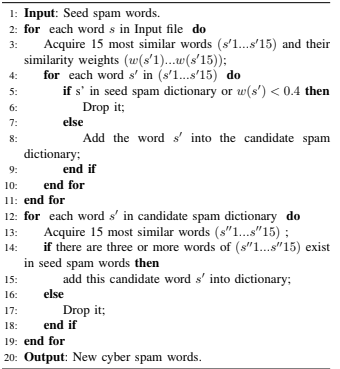

In [0]:
dissim=distance.cosine(v_spam,v_review)

<b>Initially doing for single Review</b>

<b> Part 1 of the Self-Extensible dictionary algorithm</b>

In [65]:
# print(seed[0])
# print(sentences)
#modification we can include only those words whose similarity is greater than 0.4

candidate_spam_dictionary = []
for i in seed[0]:  #for Each word in seed spam dictionary
  dissimilarity_weights = []
  v_spam  = model_for_spam_words.wv[i]  #vector of Each seed spam word
  for j in range(len(sentences)):  
    # sentences[j]   #represents each sentence
    for k in sentences[j]:  #for each word in the sentence
      v_review = model_for_reviews.wv[k]  #converting each word of the sentence into vector
      dissim=distance.cosine(v_spam,v_review) #calculating the dissimilarity
      dissimilarity_weights.append([i,k,dissim])   #dissimilarity weights for each review word
  # print(len(dissimilarity_weights))
  s = sorted(dissimilarity_weights, key = lambda x: (x[2]))   #sorting the dissimilarity weights of the words from seed words for the entire review
  
  # for j in s:   #testing purpose
  #   if(1-j[2]>=0.4):
  #     print(1-j[2])


  s_dash = []
  for j in range(0,15): #Appending 5 most similar words to the s_dash
    s_dash.append(s[j]) # s_dash and s will be three dimensional array [i,k,cosine_dissimilarity], append 5 most similar words to s_dash
  # print(len(s_dash))

  for j in range(0,15):  # for Each word in s_dash
    if((s_dash[j][1] not in seed[0]) and (1-s_dash[j][2]>=0.4)): # if s_dash is already present in the dictionary or similarity < 0.4 discard it 1-s_dash becoz its dissimilarity
      candidate_spam_dictionary.append(s_dash[j][1])

print("Candidate Spam dictionary:",candidate_spam_dictionary)  #[k] only



Candidate Spam dictionary: []


<b> Part 2 of Self-Extensible Dictionary </b>

In [0]:
for i in candidate_spam_dictionary:  #for Each word in candidate spam dictionary
  dissimilarity_weights = []
  v_candidate_dictionary  = model_for_reviews.wv[i]  #vector of Each candidate spam word because the candidate spam words has been extracted from the reviews
  for j in range(len(sentences)):  
    # sentences[j]   represents each sentence
    for k in sentences[j]:  #for each word in the sentence
      v_review = model_for_reviews.wv[k]  #converting each word of the sentence into vector
      dissim=distance.cosine(v_candidate_dictionary,v_review) #calculating the dissimilarity
      dissimilarity_weights.append([i,k,dissim])   #dissimilarity weights for each review word
  # print(len(dissimilarity_weights))
  s = sorted(dissimilarity_weights, key = lambda x: (x[2]))   #sorting the dissimilarity weights of the words from seed words for the entire review
  
  # for j in s:   #testing purpose
  #   if(1-j[2]>=0.4):
  #     print(1-j[2])


  s_double_dash = []
  for j in range(0,15): #Appending 5 most similar words to the s_dash
    s_double_dash.append(s[j][1]) # s_double_dash and s will be three dimensional array [k],storing only append 15 most similar words to s_dash

  if (len(set(double_dash) & set(seed[0]))>=3):  #if there are 3 or more than 3 words in the seed dictionary then add the word of candidate spam dictionary to the seed spam dictionary
    seed[0].append(i)



